# 선형 회귀 모델의 성능 측정

기본적으로 선형 회귀 모델은 결정계수 $R^2$으로 사용한다고 했었는데,<br> 결정계수($R^2$)의 단점은 변수(특징)이 많아질수록 값이 커지는(좋아지는) 문제가 발생. <br>

따라서 결정계수($R^2$)의 문제를 개선한 `평균 제곱근 오차`를 사용. <br>
0 에 가까울수록 예측도가 높아짐.

* `회귀 모델의 예측 능력 평가 지표 : 평균 제곱근 오차(Root Mean Square Error, RMSE)`
* 평균 제곱근 오차는 분산의 제곱근, 즉 표준 오차가 됨.
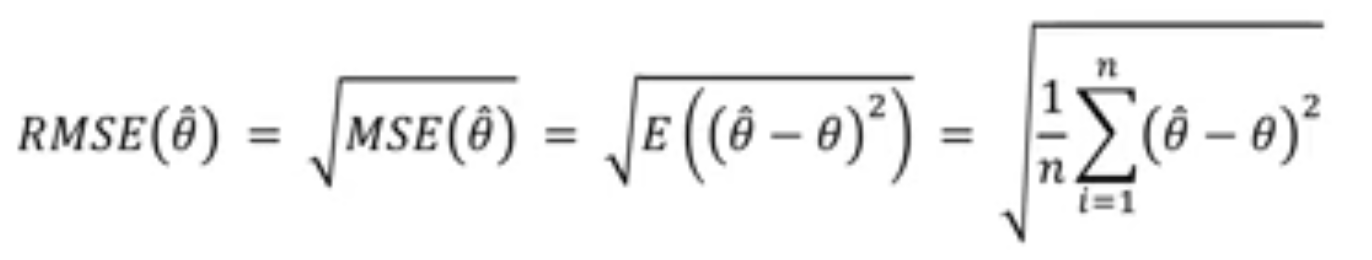

$\theta$ : 실제값 <br>
$\hat \theta$ : 관측값

# 데이터 프레임 구성

In [7]:
import pandas as pd
import numpy as np

# 레드와인 정보
redwine  = pd.read_csv('winequality-red.csv', sep=',', header=0) # header는 0번째 열에 있다.
redwine['type'] = 'red'

# 화이트와인 정보
whitewine  = pd.read_csv('winequality-white.csv', sep=';', header=0) # header는 0번째 열에 있다.
whitewine['type'] = 'white'

# 레드와인 + 화이트와인
wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(' ','_') # Coulmn명에 ' '공백이 있으면, data를 다루기 힘들기 때문에 '-'로 바꿔준다
wine.head()

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_13647/2161955462.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine = redwine.append(whitewine)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# 모델 클래스 지정하기

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

In [9]:
X = wine.drop(['type', 'quality'], axis=1)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y = wine.quality

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 데이터 fit하기

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
X_train.columns # 11개 변수(특징)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
lr.coef_ # 11개 변수(특징)에 대한 계수

array([ 5.55618691e-02, -1.29945358e+00, -1.08205046e-01,  4.52070539e-02,
       -3.95901596e-01,  5.76479819e-03, -2.47760359e-03, -5.30023471e+01,
        3.50283862e-01,  7.49149475e-01,  2.78530060e-01])

In [16]:
lr.intercept_ # 상수항

54.058003854665714

In [17]:
y_pred = lr.predict(X_test)

# 직접 만든 RMSE

In [18]:
import numpy as np

def rmse(y_real, y_pred) :
    return np.sqrt(np.mean((y_real - y_pred)**2))

In [19]:
np.round(rmse(y_test, y_pred), 2)

0.73

# scikit-learn의 RMSE

RMSE는 없고 MSE에 np.sqrt() method 사용

In [20]:
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

0.73